<a href="https://colab.research.google.com/github/ttatjanaa/ttatjanaa/blob/main/%D0%94%D0%9711_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 36.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета - Загружаем фаил для работы в Колабе
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('HospitalityEmployees.csv', index_col='Date', parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

Saving HospitalityEmployees.csv to HospitalityEmployees.csv
348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В df 348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

1. Постройте график временного ряда

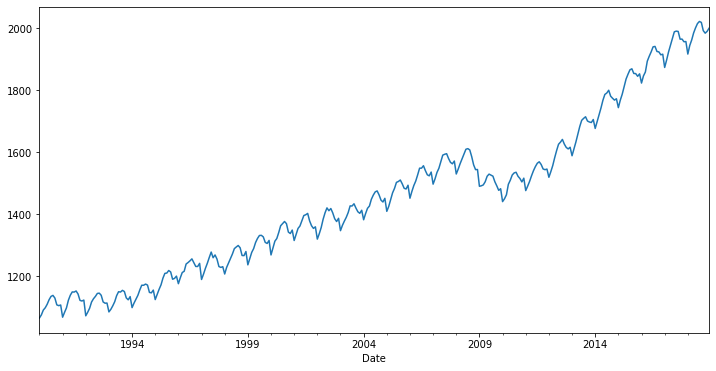

In [ ]:
ax = df['Employees'].plot(figsize=(12,6))
ax.autoscale(axis='x', tight=True)

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

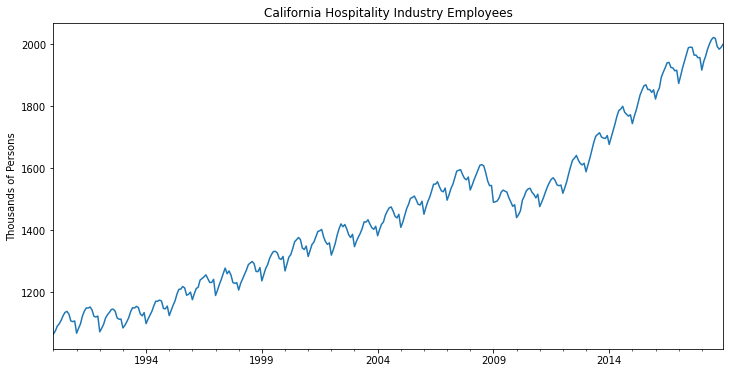

In [ ]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''

ax = df['Employees'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

На графике наблюдается положительный тренд роста числа сотрудников со спадом в 2009 году

2. Выполните ETS декомпозицию

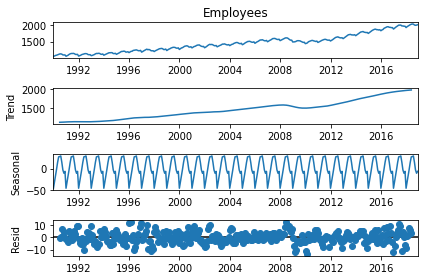

In [ ]:
r = seasonal_decompose(df['Employees'], model='additive')

r.plot();

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров

In [ ]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 21 Mar 2022   AIC                           2208.504
Time:                                      20:43:05   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

4. Разделите данные на train/test
Установите один год (12 записей) для тестирования.

In [ ]:
train = df.iloc[:len(df)-12]

test = df.iloc[len(df)-12:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

5. Обучите SARIMA с найденными параметрами на train

In [ ]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))

results = model.fit()

results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Mon, 21 Mar 2022   AIC                           2128.116
Time:                                      20:46:52   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.288      0.000       0.839       1.009
ma.L1         -0.9583      0.071    -13.552      0.000      -1.097      -0.820
ma.L2          0.1496      0.061      2.446      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.133      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.153      0.000      -0.838      -0.666
sigma2        28.7706      1.685     17.073      0.000      25.468      32.074
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

6. Получите прогнозируемые значения

In [ ]:
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions SARIMAX(1, 1, 2)x(1, 0, 1, 12)')

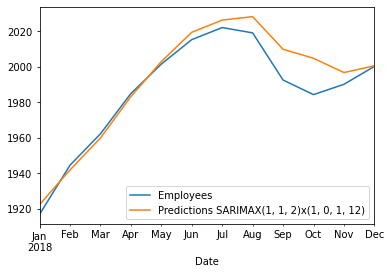

In [ ]:
test['Employees'].plot(legend=True)
predictions.plot(legend=True)

7. Нарисуйте графики прогнозируемых и известных значений

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

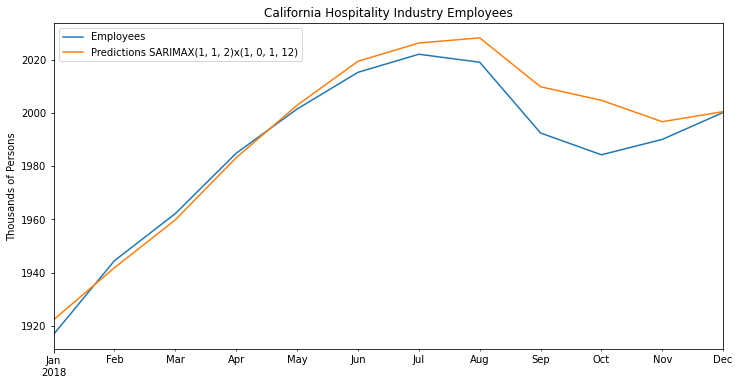

In [ ]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''


ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

8. Оцените качество модели с помощью MSE и RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

mse_value = mean_squared_error(test['Employees'], predictions)
rmse_value = rmse(test['Employees'], predictions)
mape_error = np.mean(np.abs(predictions - test['Employees'])/test['Employees'])*100

print(f'SARIMA(1,1,2)(1,0,1,12) MSE Error: {mse_value:11.10}')
print(f'SARIMA(1,1,2)(1,0,1,12) RMSE Error: {rmse_value:11.10}')
print(f'SARIMA(1,1,2)(1,0,1,12) MAPE Error: {mape_error:11.10}')

SARIMA(1,1,2)(1,0,1,12) MSE Error: 77.67620142
SARIMA(1,1,2)(1,0,1,12) RMSE Error: 8.813410317
SARIMA(1,1,2)(1,0,1,12) MAPE Error: 0.3183767466


In [ ]:
test['Employees']

Date
2018-01-01    1916.8
2018-02-01    1944.5
2018-03-01    1962.2
2018-04-01    1984.9
2018-05-01    2001.5
2018-06-01    2015.3
2018-07-01    2022.1
2018-08-01    2019.1
2018-09-01    1992.5
2018-10-01    1984.3
2018-11-01    1990.1
2018-12-01    2000.2
Freq: MS, Name: Employees, dtype: float64

In [ ]:
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.67620142
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.813410317


9. Натренируйте модель на полном датасете и предскажите на год вперед

In [ ]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 21 Mar 2022   AIC                           2208.504
Time:                                      20:53:51   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) Forecast')

10. Постройте график предсказаний и график исходных данных

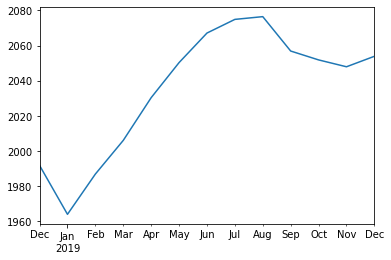

In [ ]:
fcast.plot()

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

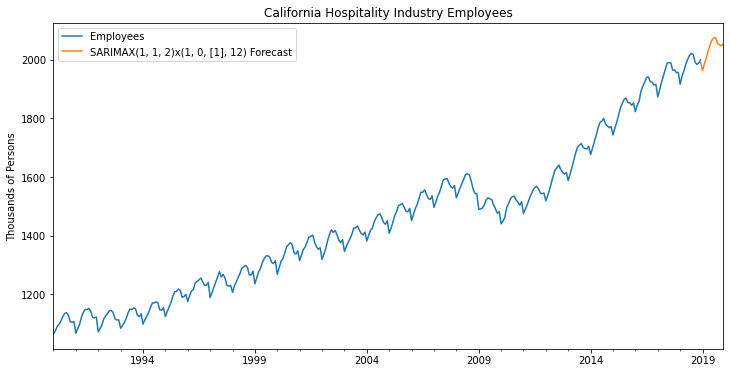

In [ ]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''


ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

PROPHET

In [ ]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [ ]:
train.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [ ]:
test.head()

,Employees
Date,
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5


In [ ]:
!pip install pystan

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()
model

In [ ]:
train_0 = train.reset_index()
test_0 = test.reset_index()

In [ ]:
train_0.head()

,Date,Employees
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [ ]:
train_0.columns = ['ds', 'y']
test_0.columns = ['ds', 'y']

In [ ]:
train_0.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [ ]:
model.fit(train_0)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Видим, что алгоритм проигнорировал, выбирая параметры

недельную сезонность (для недельной сезонности нам нужно иметь данные минимум за месяц, чтобы суметь использовать ее в модели)

дневную сезонность (дневная сезонность может использоваться в случае, если данные собираются по часам/минутам, в нашем случае данные представлены по месяцам).

И обнаружил годовую сезонность и использовал его при настройке модели.

Качество модели
Посмотрим на качество модели. Для этого нам необходимо задать прогноз (в нашем случае это год) и создать дата-фрейм с датами из «будущего», для которого модель потом будет строить прогноз.

In [ ]:
future = model.make_future_dataframe(periods=12, freq='MS')
future.tail(12)

,ds
336,2018-01-01
337,2018-02-01
338,2018-03-01
339,2018-04-01
340,2018-05-01
341,2018-06-01
342,2018-07-01
343,2018-08-01
344,2018-09-01
345,2018-10-01


In [ ]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1105.140489,1050.027814,1067.317649,1105.140489,1105.140489,-46.211417,-46.211417,-46.211417,-46.211417,-46.211417,-46.211417,0.0,0.0,0.0,1058.929072
1,1990-02-01,1105.802454,1064.723569,1082.431043,1105.802454,1105.802454,-31.904082,-31.904082,-31.904082,-31.904082,-31.904082,-31.904082,0.0,0.0,0.0,1073.898372
2,1990-03-01,1106.400357,1080.040044,1097.638641,1106.400357,1106.400357,-17.429935,-17.429935,-17.429935,-17.429935,-17.429935,-17.429935,0.0,0.0,0.0,1088.970422
3,1990-04-01,1107.062322,1096.365122,1114.238138,1107.062322,1107.062322,-2.276962,-2.276962,-2.276962,-2.276962,-2.276962,-2.276962,0.0,0.0,0.0,1104.785359
4,1990-05-01,1107.702933,1113.390771,1130.569835,1107.702933,1107.702933,14.034054,14.034054,14.034054,14.034054,14.034054,14.034054,0.0,0.0,0.0,1121.736986


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
343,2018-08-01,2076.369515,2065.510523,2087.270047
344,2018-09-01,2067.030396,2055.872770,2078.553264
345,2018-10-01,2054.682992,2042.281056,2066.633459
346,2018-11-01,2052.813211,2039.867019,2065.267633
347,2018-12-01,2063.225608,2049.375385,2076.943435


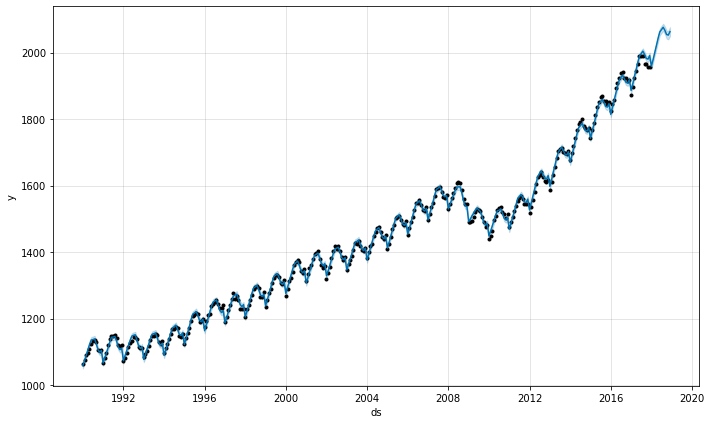

In [ ]:
model.plot(forecast);

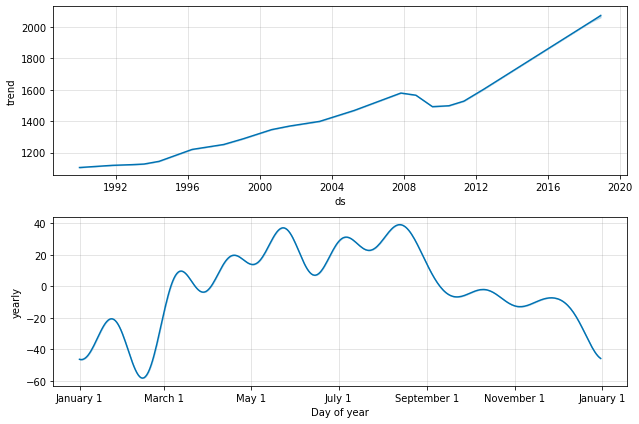

In [ ]:
model.plot_components(forecast);

Тренд у сотрудников возрастающий и  еткая годовая сезонность:

меньше всего в середине февраля

среди месяцев больше всего кол-ва сотрудников в июне и августе

Ошибка прогноза

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast['yhat'].tail(12), test_0['y']) 

51.062927174242624

In [ ]:
modul_dif = np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y'])

dif = np.mean(modul_dif/test_0['y']) 

dif_percent = dif*100

dif_percent

2.5677471600830106

Отклонение на 2.5%

Настройка параметров модели

In [ ]:
model_1 = Prophet(growth = 'linear', yearly_seasonality = True, seasonality_mode='additive')
model_1.fit(train_0)

future_1 = model_1.make_future_dataframe(periods=12, freq='MS')
forecast_1 = model_1.predict(future_1)
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(12), test_0['y'])
print('MSE: ', error_forecast_1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE:  51.062927174242624


In [ ]:
np.mean(np.abs(forecast_1.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

2.5677471600830106

Ошибка составила такой же процент и означает, что параметры в данном случае модель сама предсказала и установила корректные.